### Solar Power Generation
- Renewable Energy has been growing very quickly in the world and with that Solar Power Plant has became an integral part of Power Industry. 
- As we know Solar Power Plant are directly installed in open area wherein there is direct impact of sunlight. It's Generation is highly impacted by **Weather Condition**, **Tilt Angle**,**Azimuth** and many such parameters.
- Now, while developing any power plant our main intention would always be to generate the maximum amount of **Power**.
- So, to understand how different parameters like **Weather Condition**, **Tilt Angle**,**Azimuth** affects the generation we can perform an analysis how this parameters impact the generation.
- with this we will also predict **Solar Generation using Parameters as inputs!!**

### Dataset 
- Here by we are having an dataset containing Solar Power Generation value, weather data and various power plant details

### Importing various libraries for usage

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
dts = pd.read_csv('solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [3]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

### We can see that there two datatypes float and int, and it seems cloud cover is the categorical which is already encoded.

In [4]:
dts.isna().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

### Yeah!! there are no missing value in the dataset...

In [5]:
dts.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


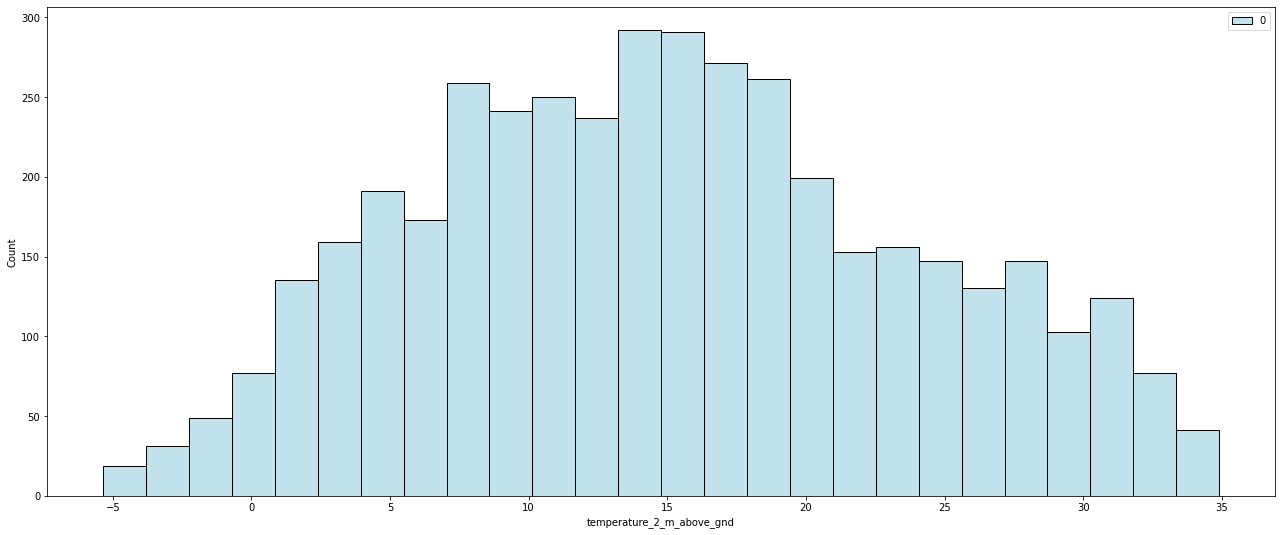

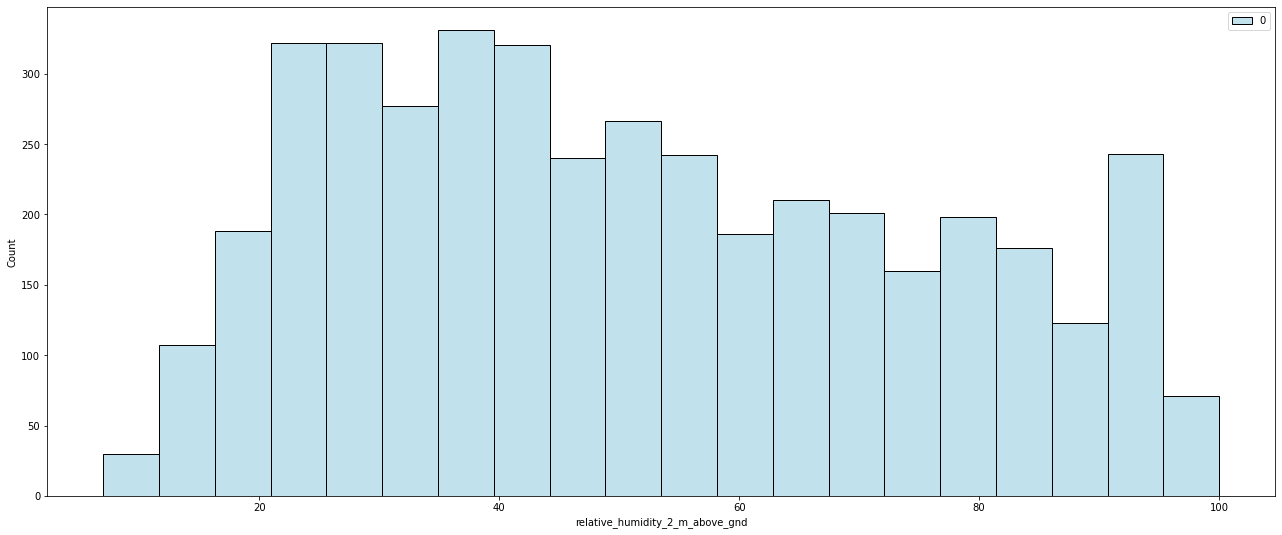

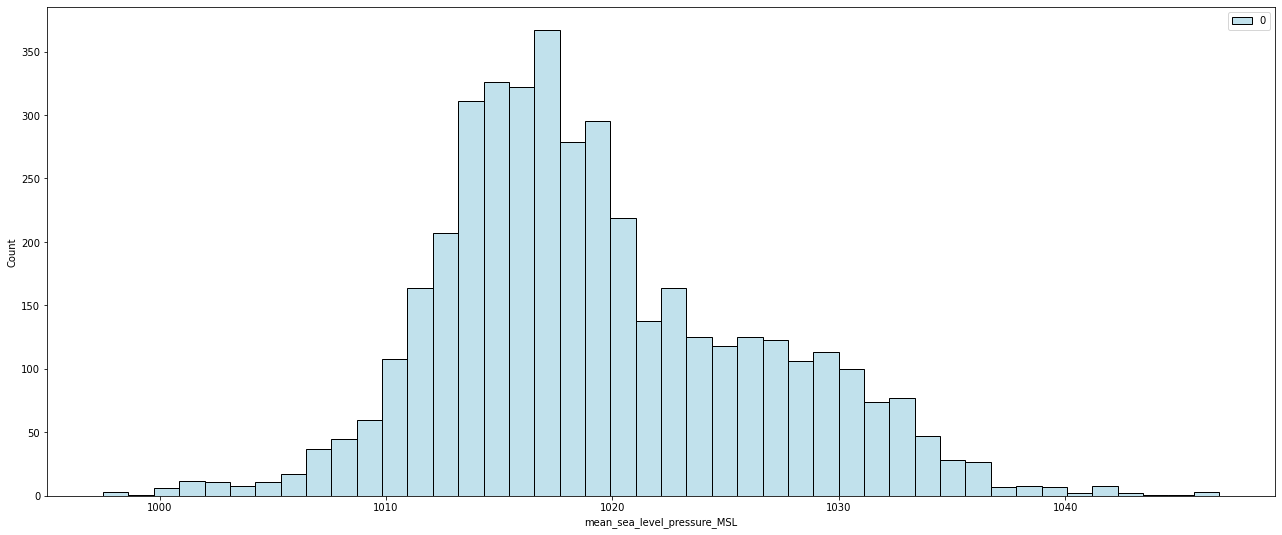

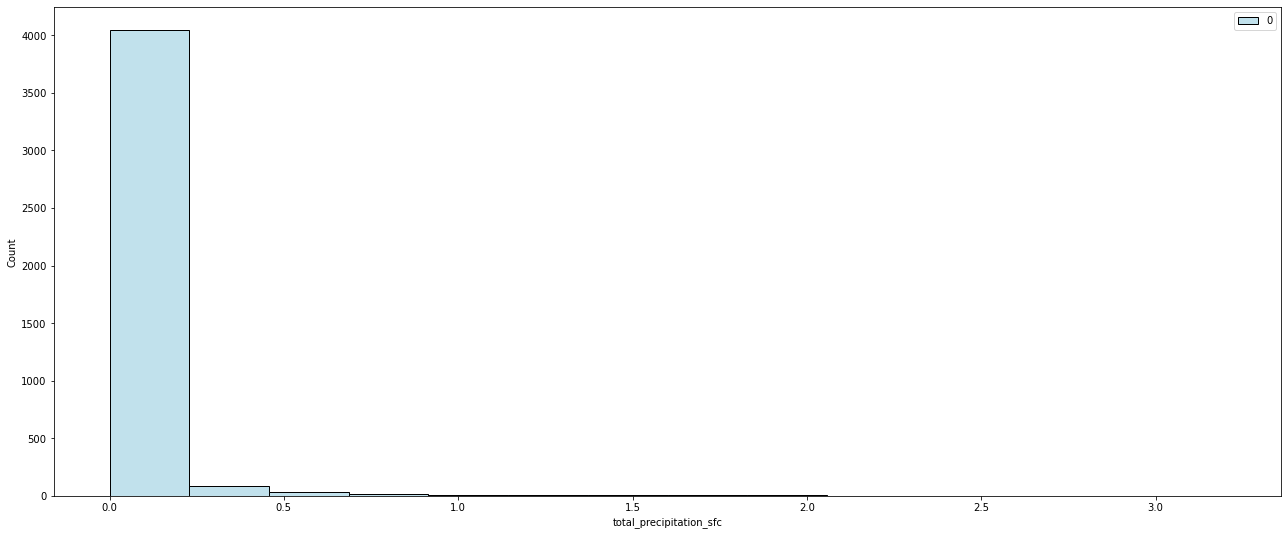

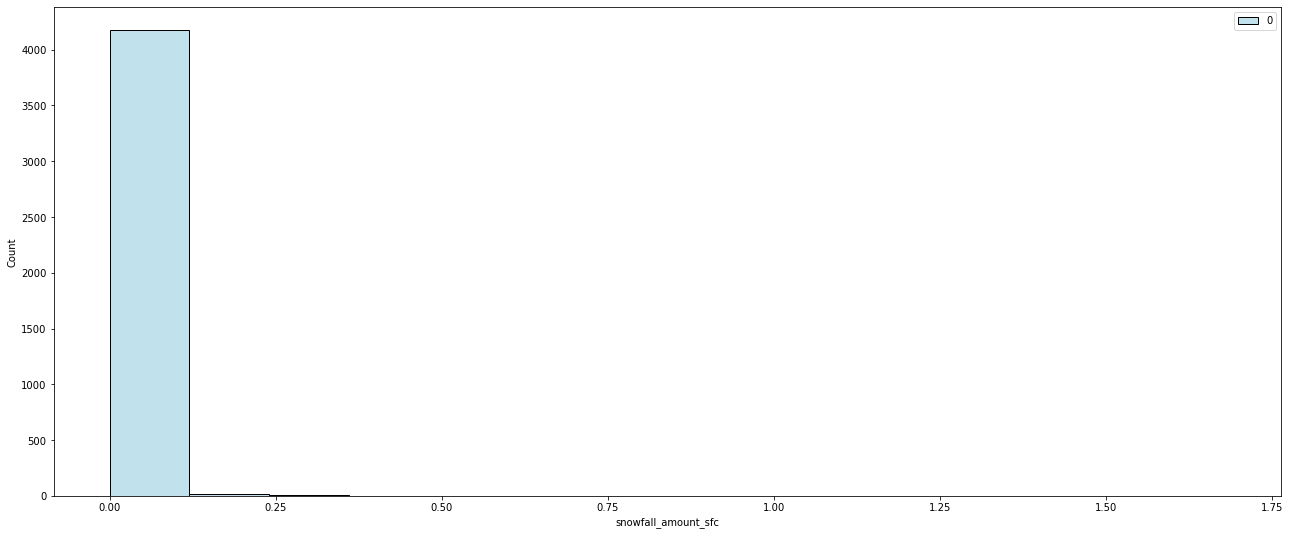

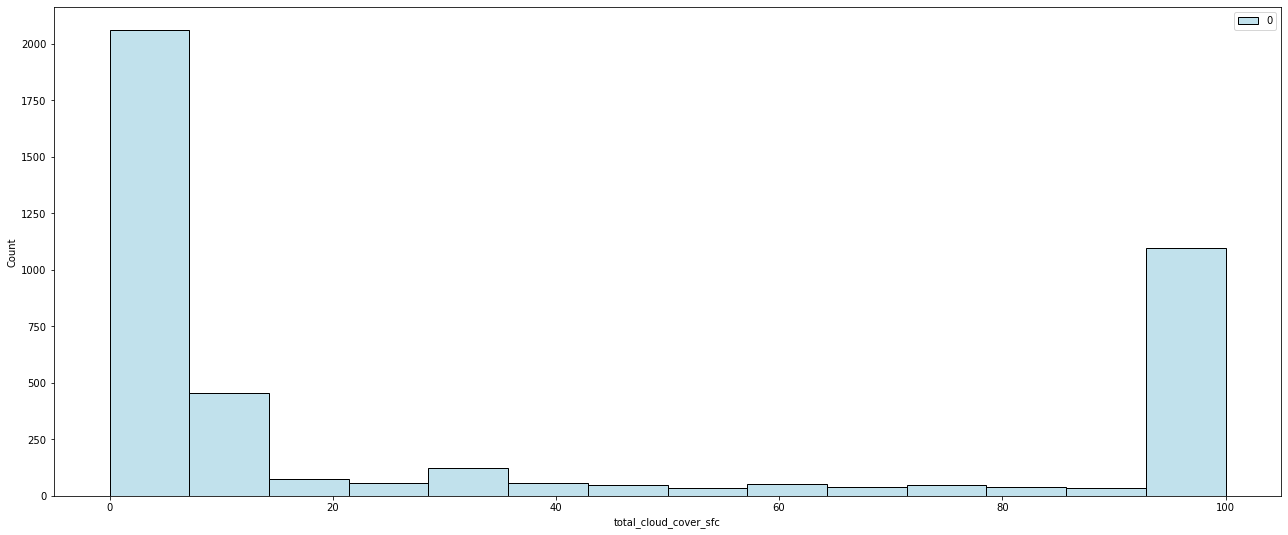

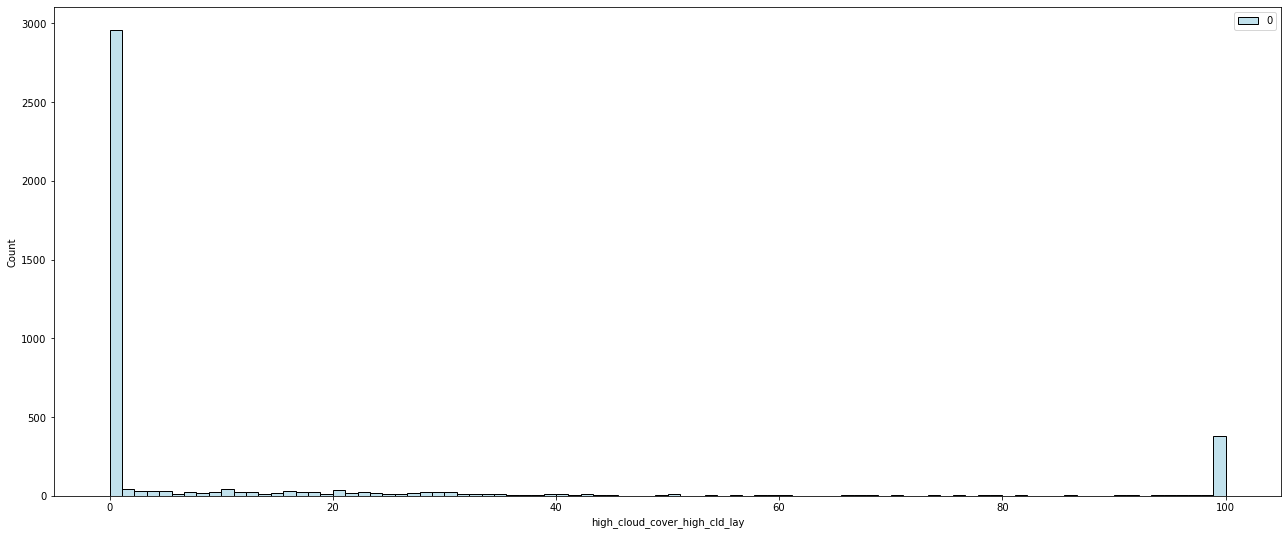

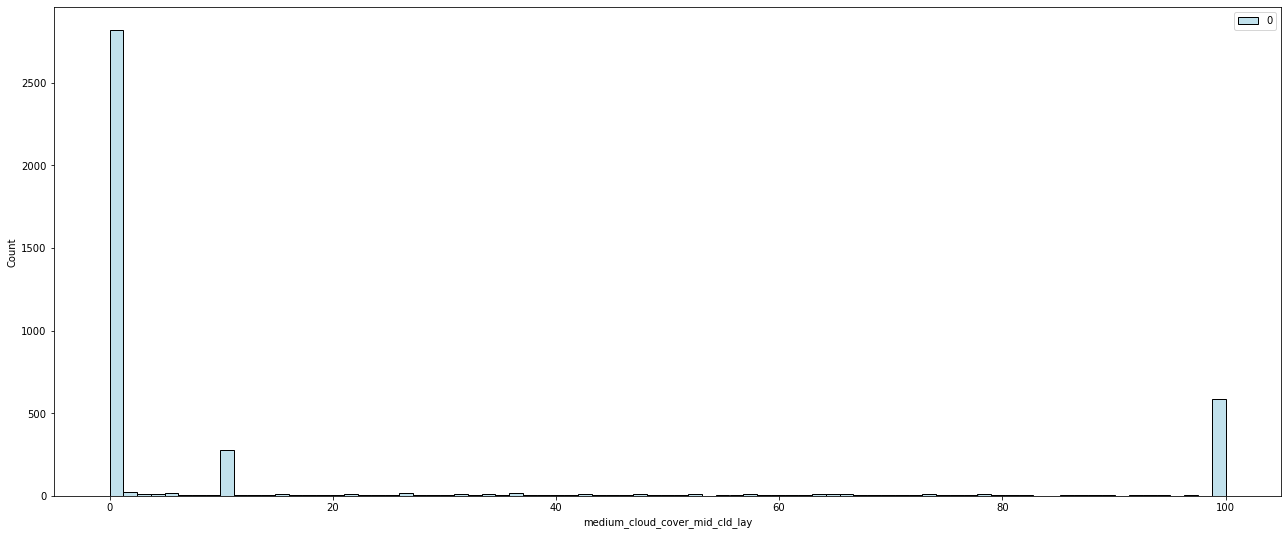

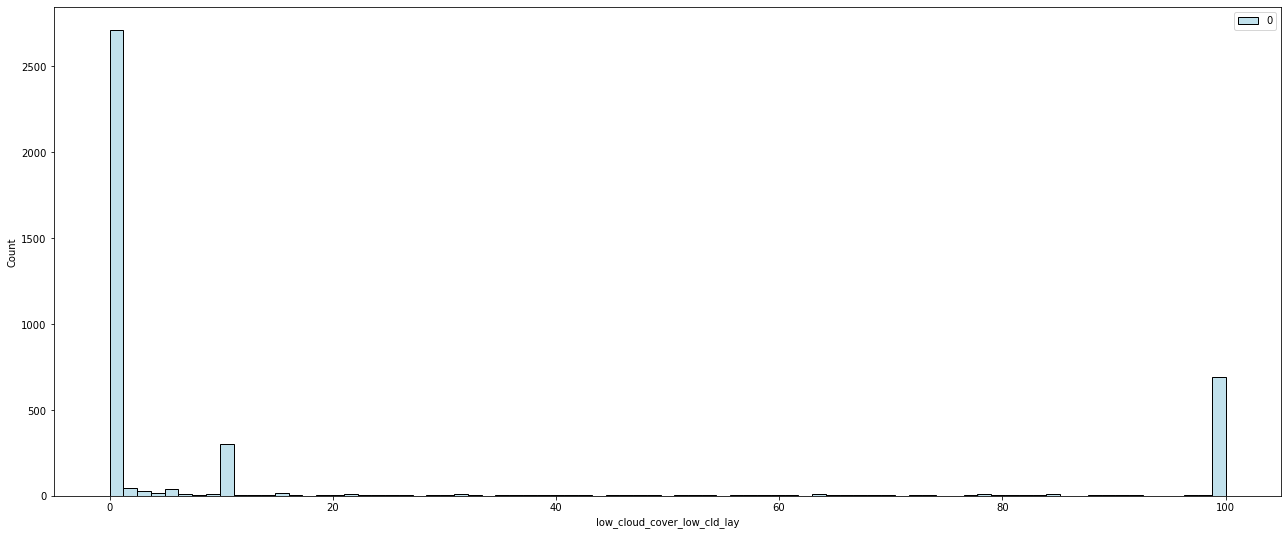

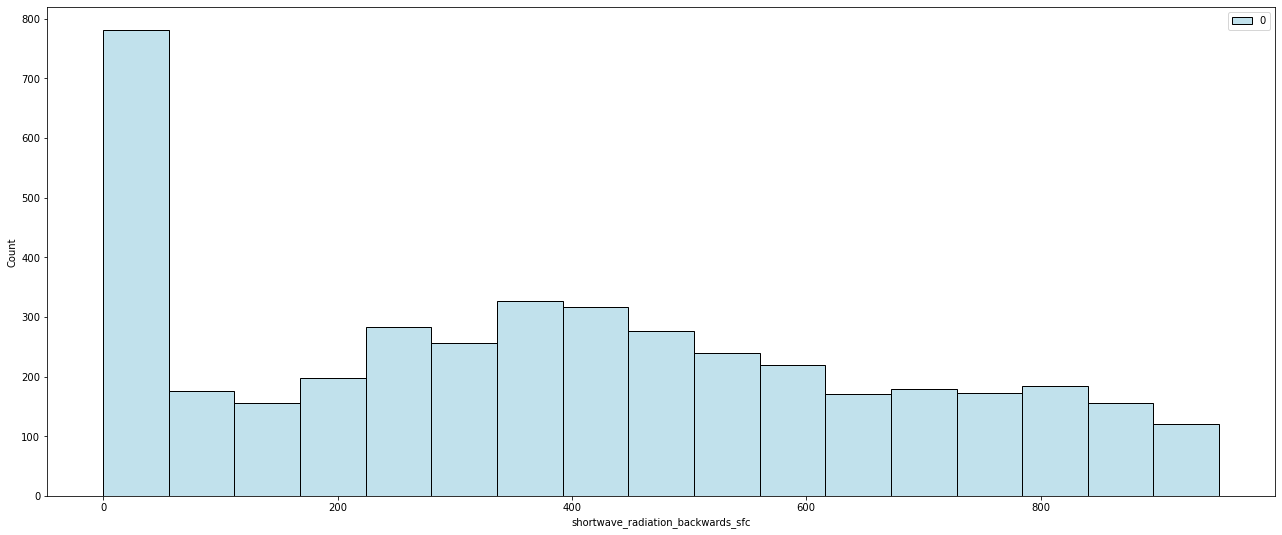

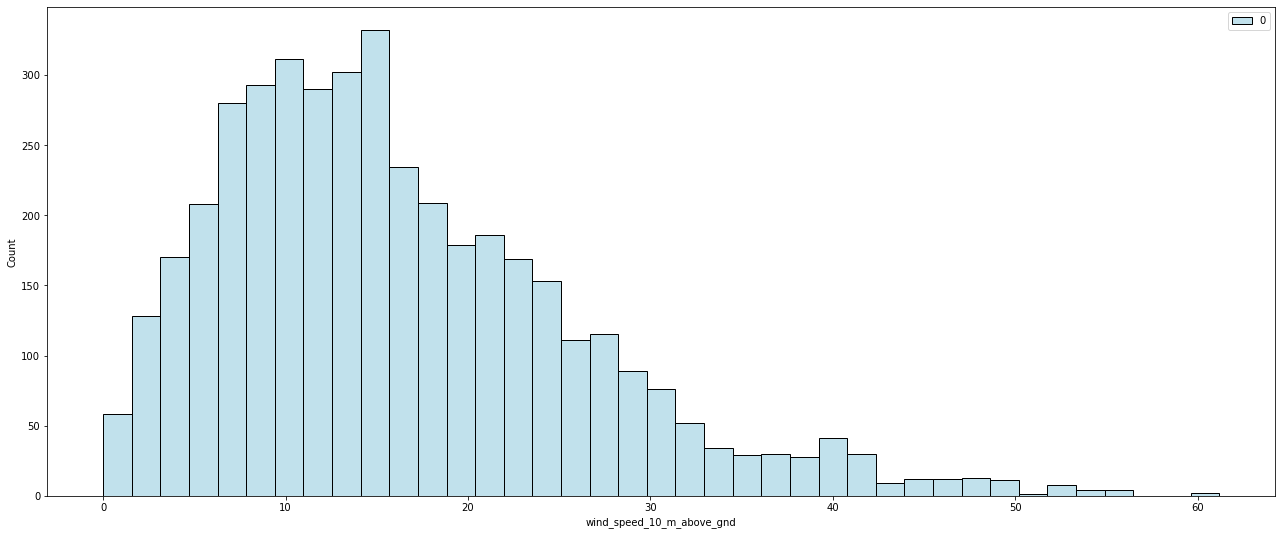

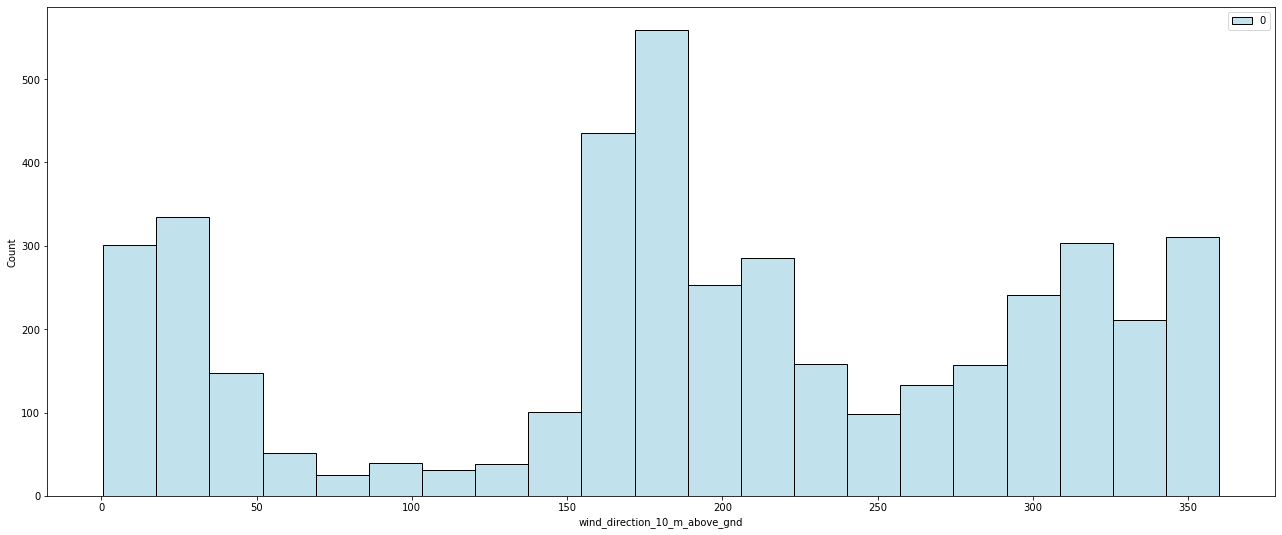

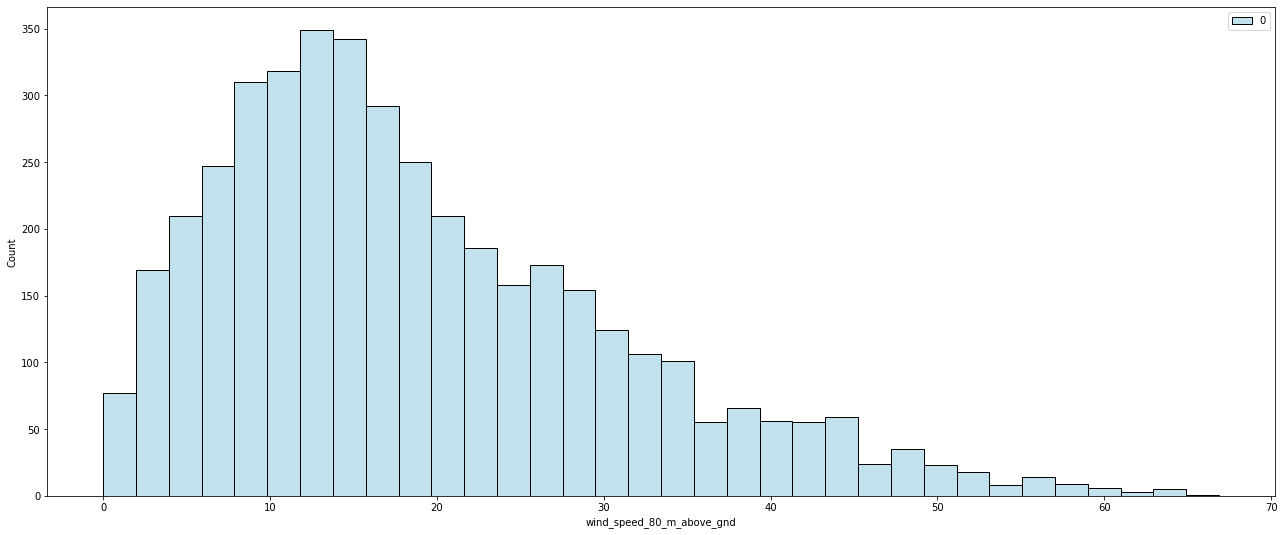

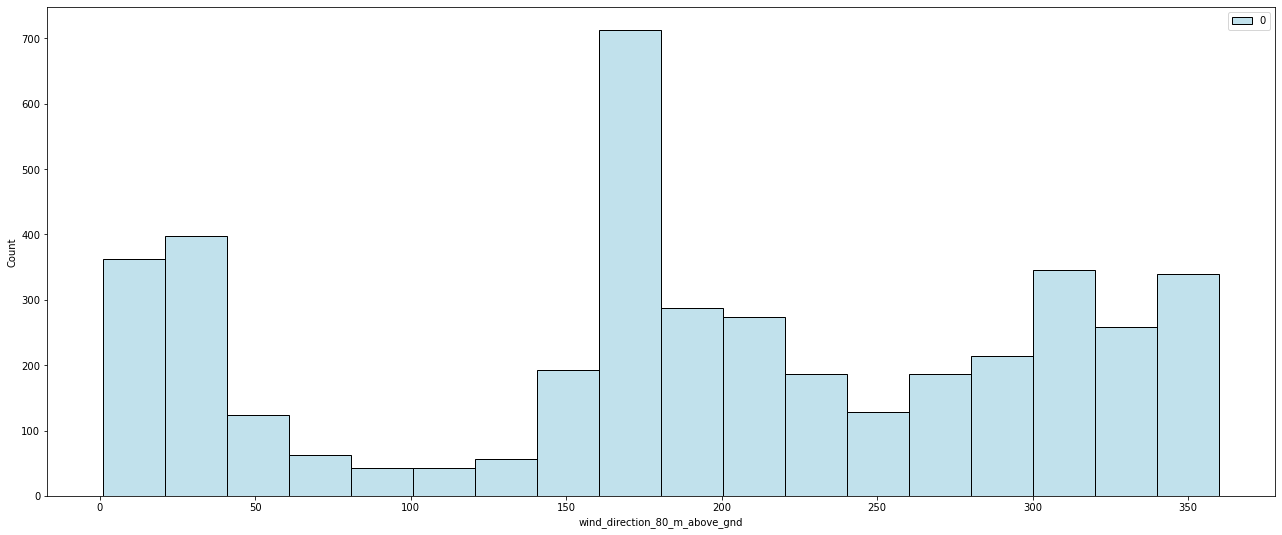

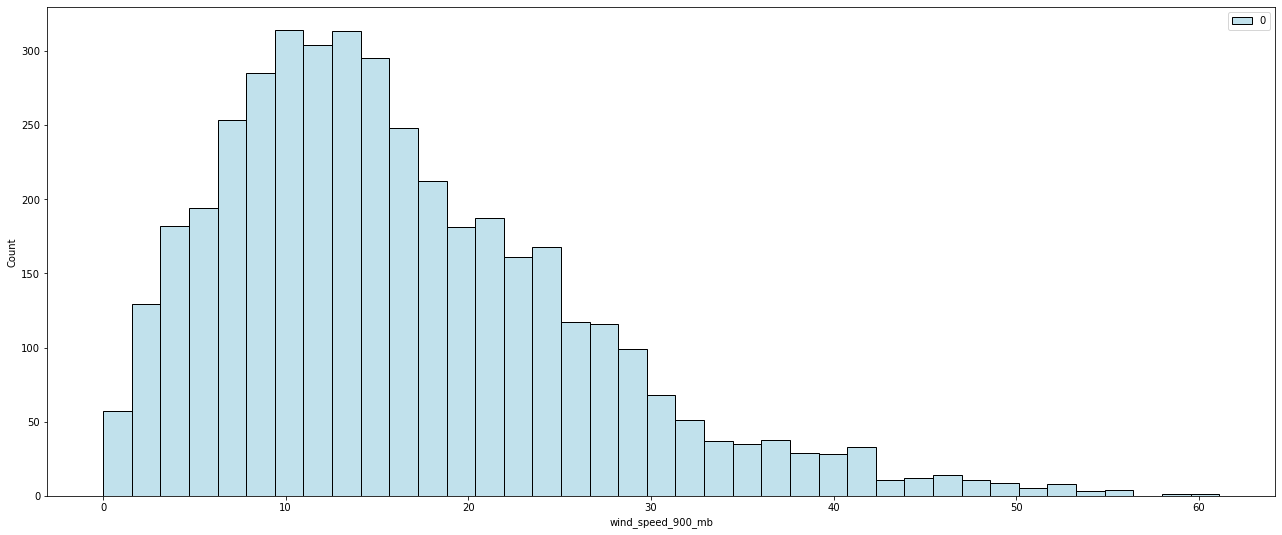

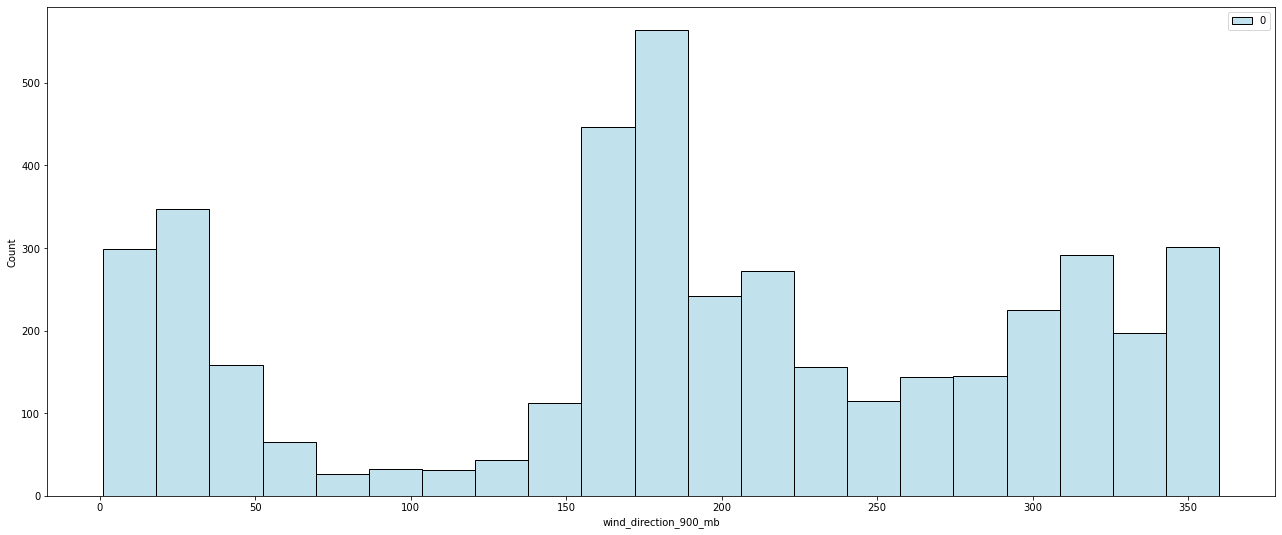

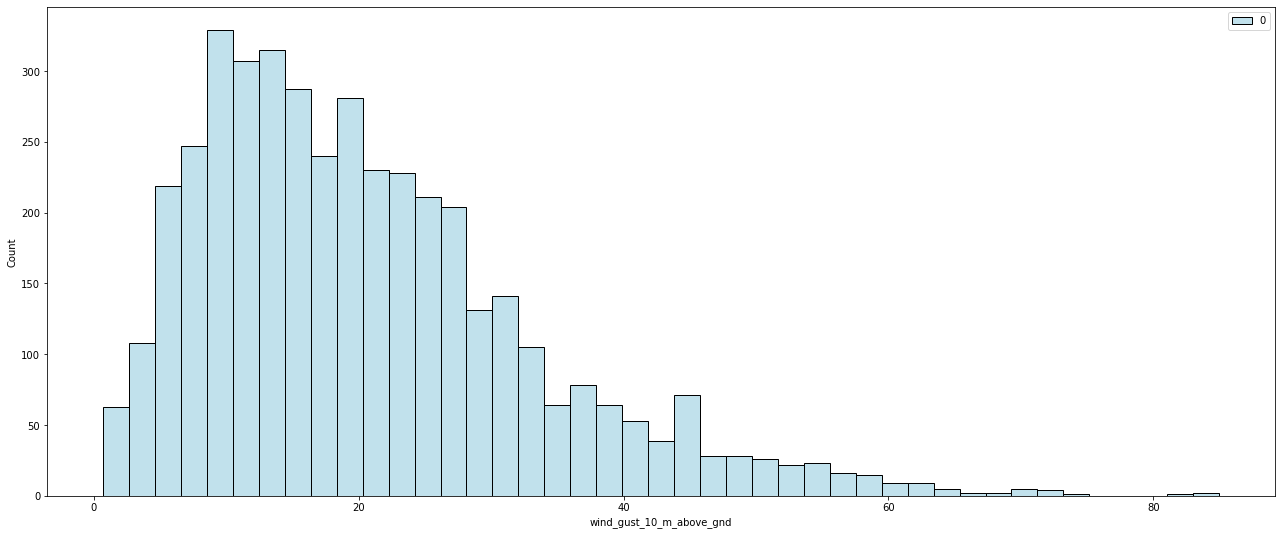

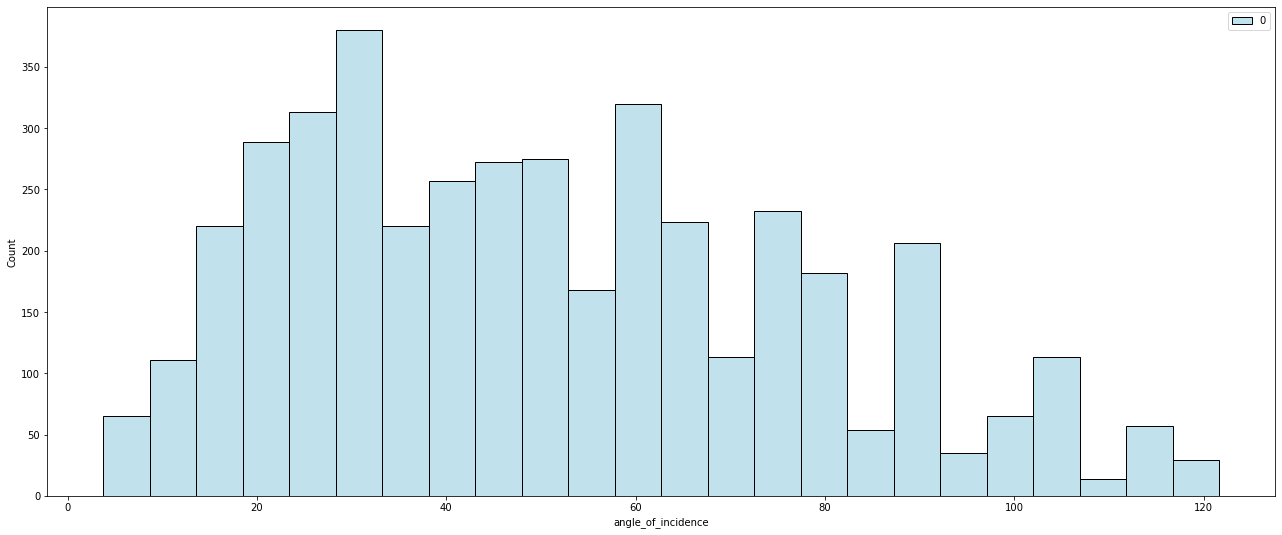

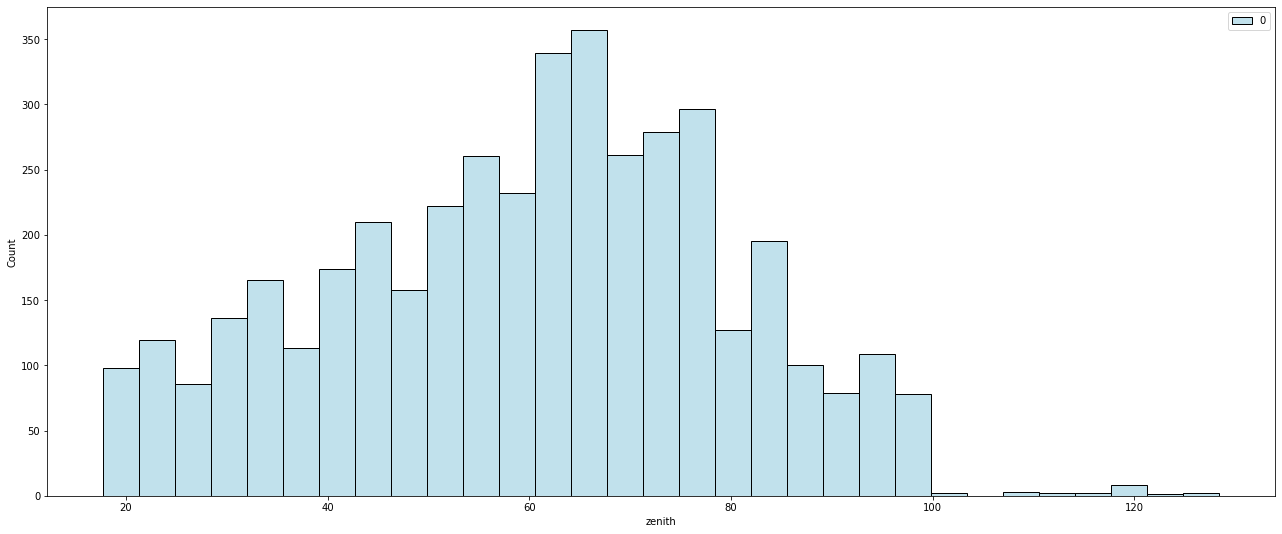

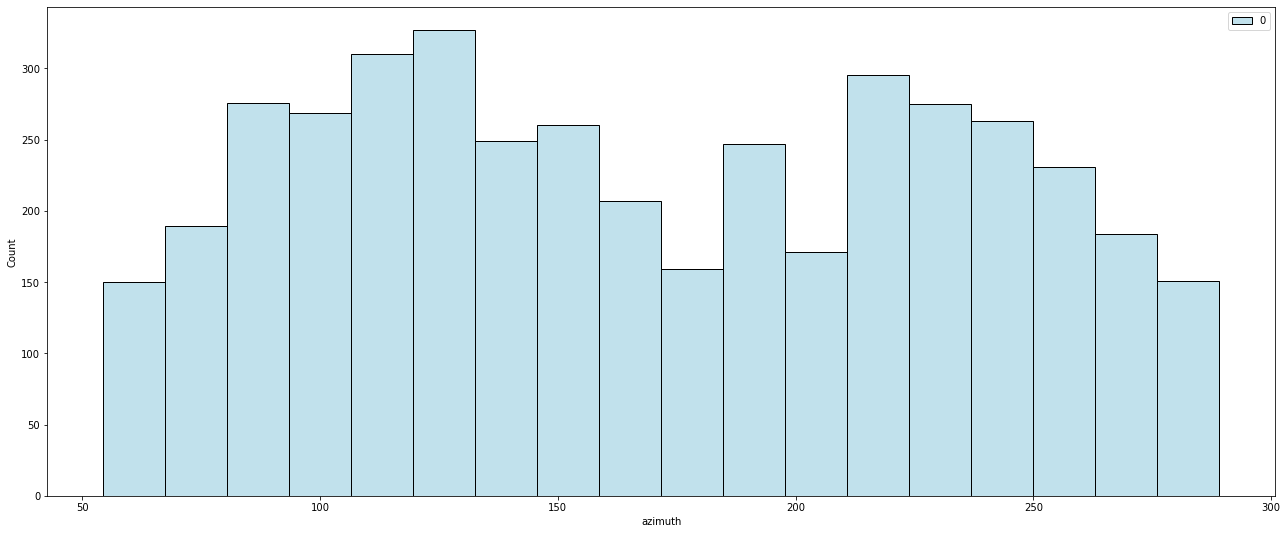

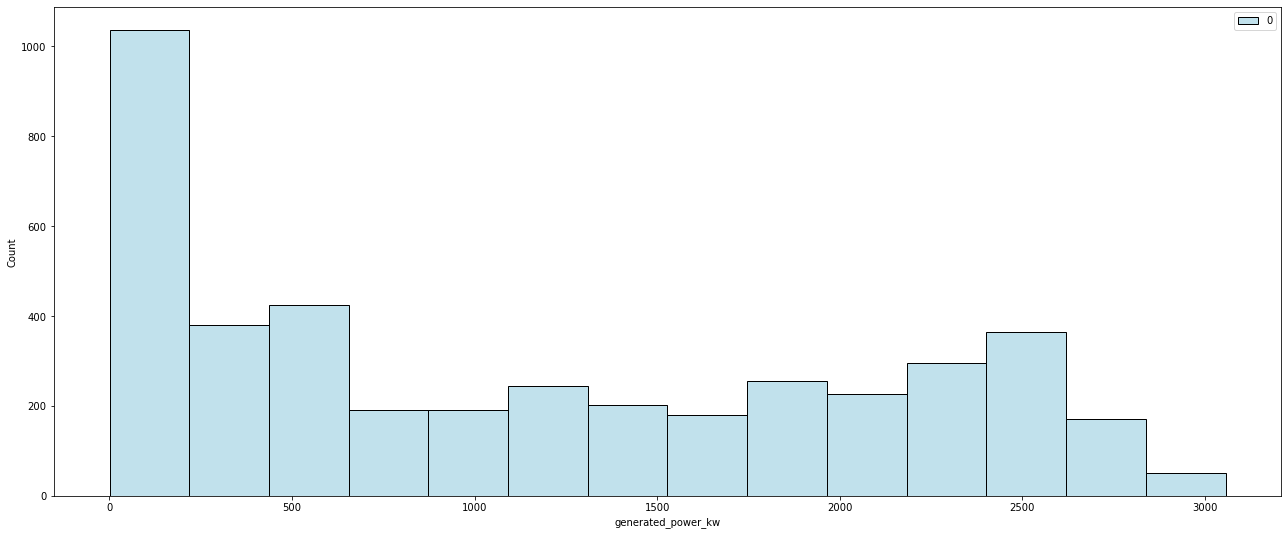

In [6]:
# Histograms for every column
for feature in dts.columns:
    fig,axs = plt.subplots(figsize=(22,9))
    sns.histplot(dts[feature],color = 'lightblue')
    plt.legend([0,1],loc='upper right')
    plt.show()

### From Histograms we can see the distribution of values in every feature

C:\Users\Viren\AppData\Local\Temp\ipykernel_1084\2778565061.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


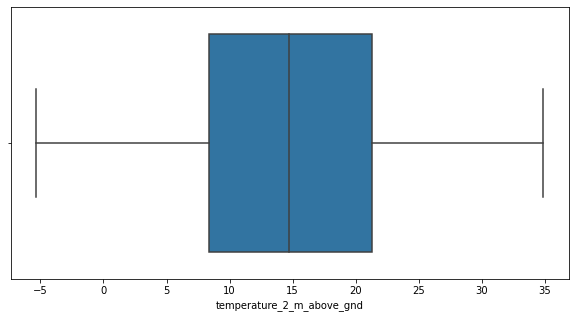

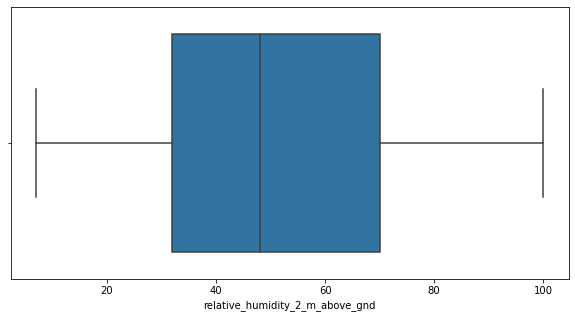

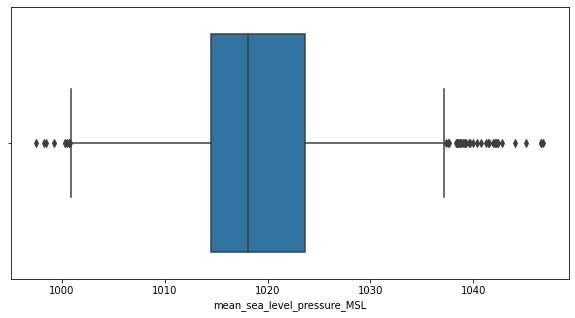

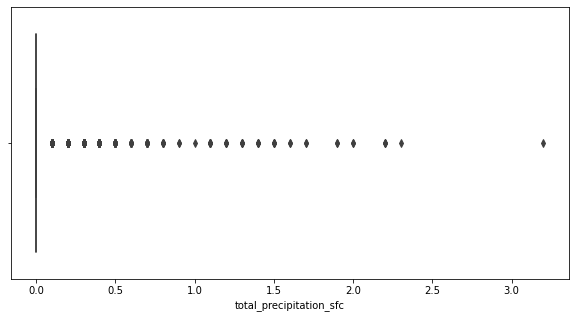

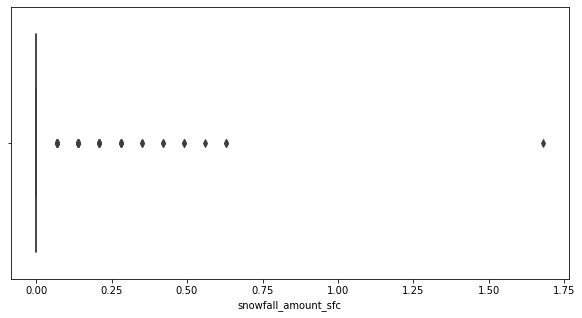

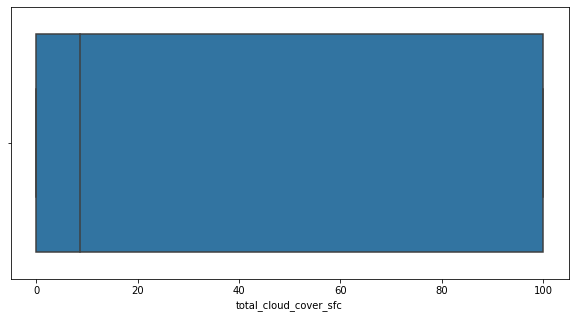

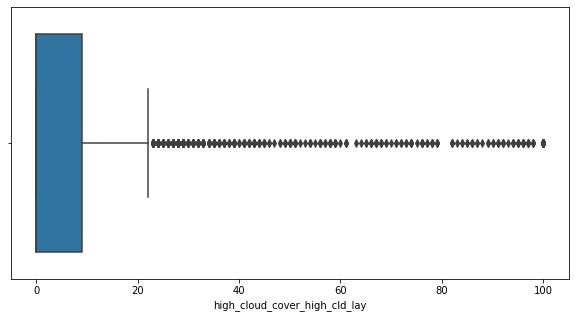

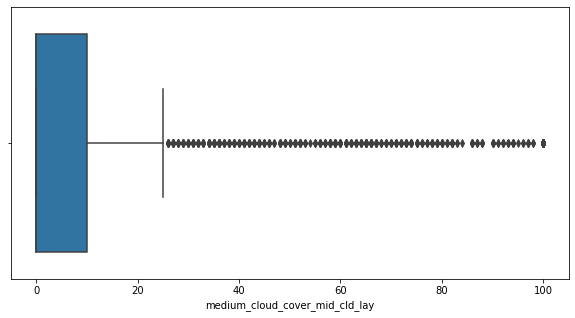

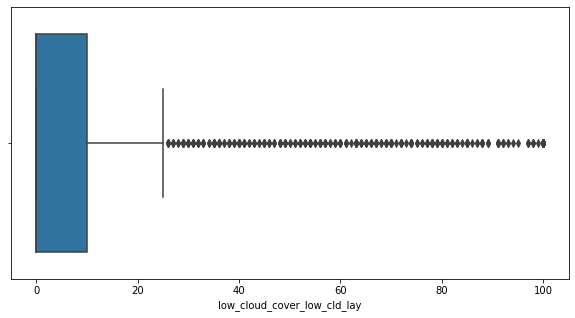

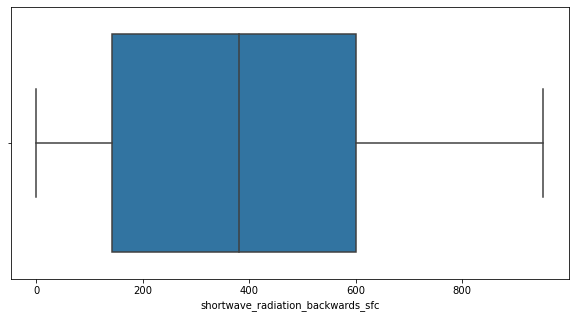

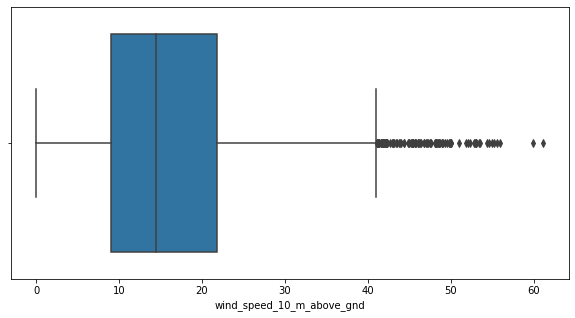

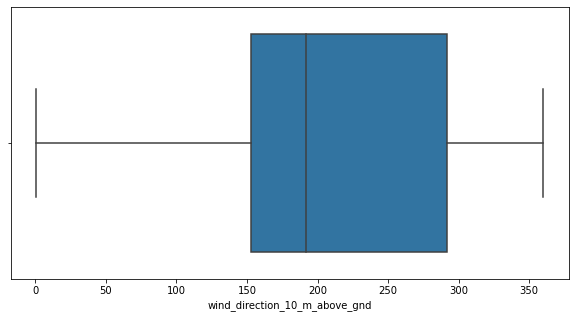

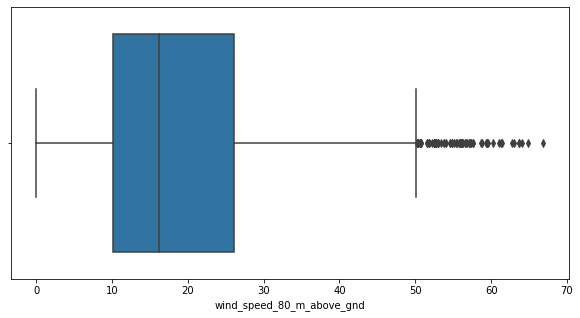

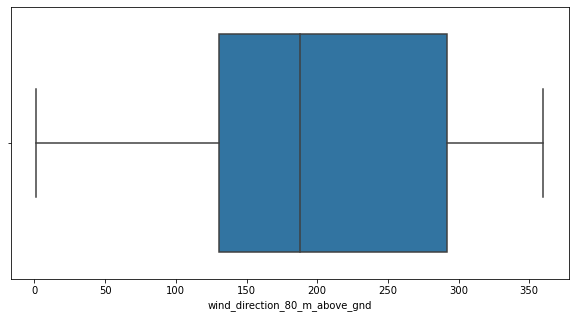

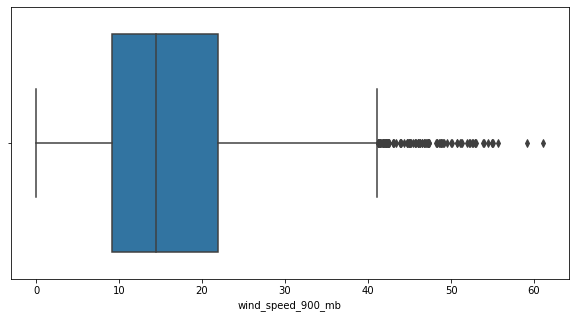

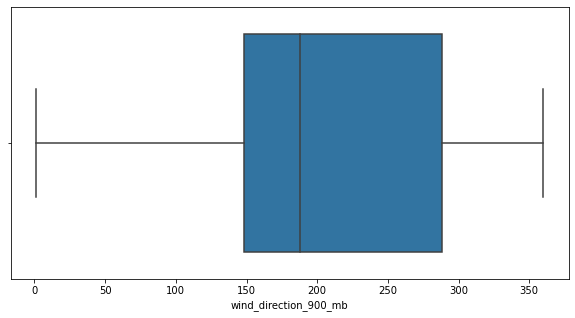

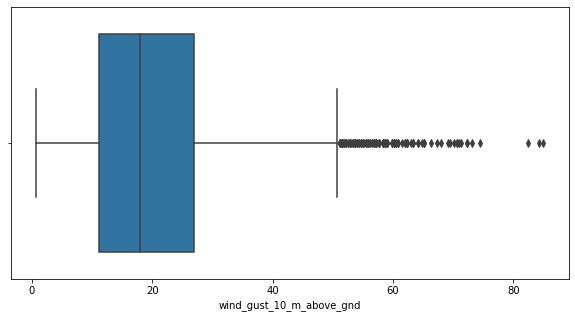

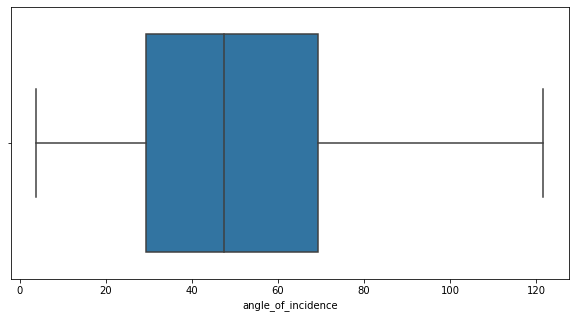

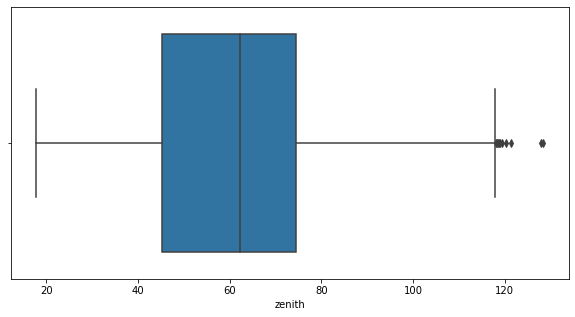

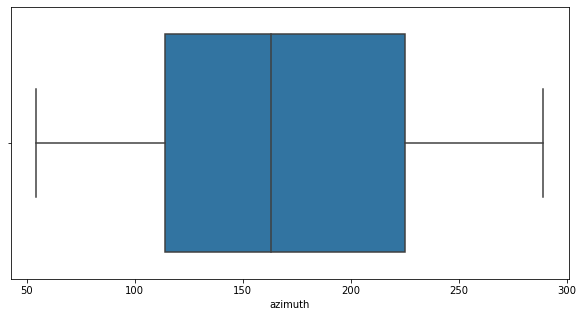

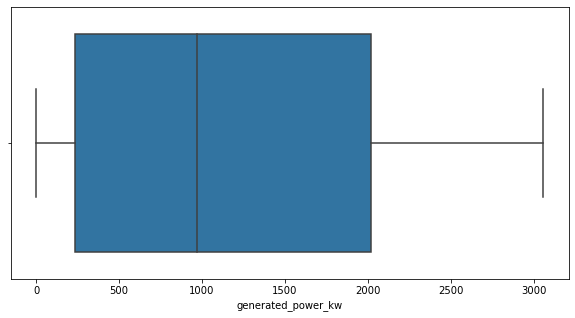

In [7]:
# Boxplot of every column for any outiers
for feature in dts.columns:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x=dts[feature]);

### Boxplots can help us to determine the presence of outliers in features

- From this we get that precipitaion,snowfall, cloud_cover are the features having outliers, but those are due to very less occurance of these features, so we cannot neglect those...

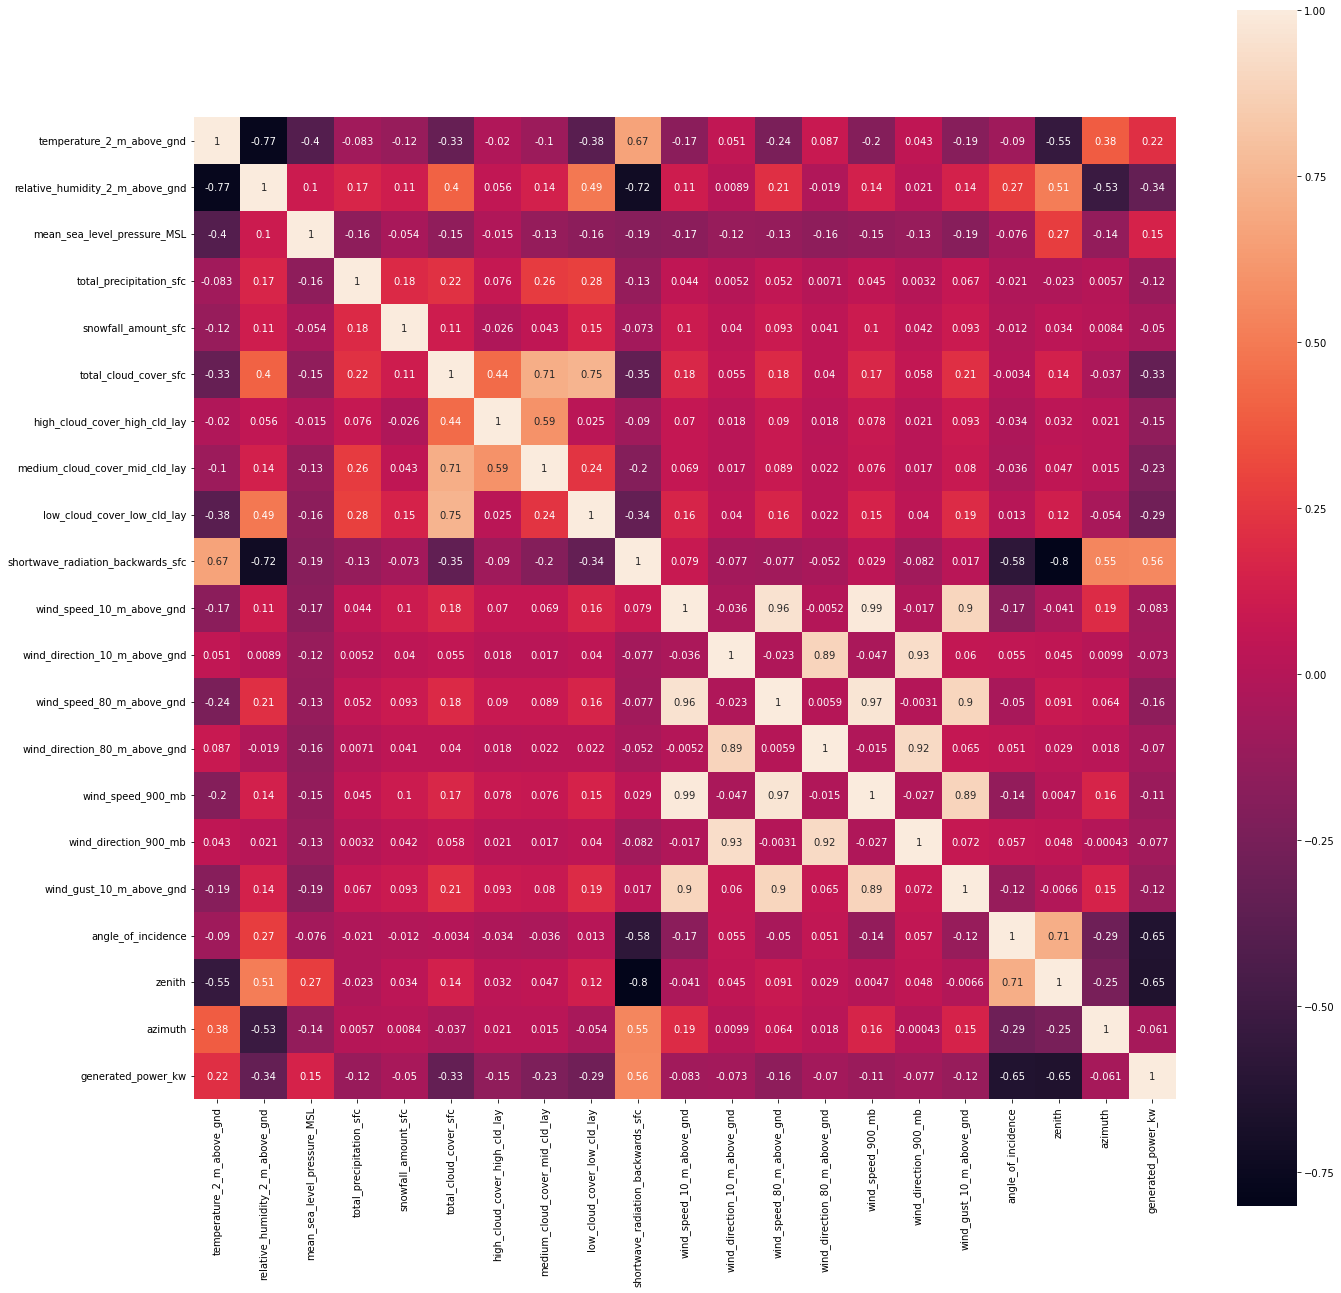

In [8]:
# Preparing heatmap of correlation
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

**OBSERVATIONS**
- High Correlation between Zenith and Agnle of Incidence of -0.65
- Shortwave radiation backwards and Generate Power KW has corr of 0.56
- Relative Humidity and Zenith are +ve corr (0.51)
- Relative Humidity and Low Cloud Cover are + ve correlated (0.49)
- Angle of Incidence and Zenith are -vely correlated with Genarted Power (-0.65)
- -ve corr between Zenith and temperature of -0.55
- High negative corr exists btw Shortwave radiation backwards and Zenith (-.8)
- Shortwave radiation backwards and Relative humidity are -vely correlated (-.72)
- Relative humidity and Temperature are -vely correlated (-.77)
- From this we can clearly see that **Zenith,shortwave radiation and Azimuth** are the features with maximum correlation with **generated_power_kw** 


## Splitting of Dataset

In [9]:
# Let's split the Dataset into X and y 
# Wherein generated_power_kw is our target variable
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [10]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [11]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

## Splitting Training and Test sets

In [12]:
# we will use train_test_split to split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (2949, 20) (2949, 1) 
Test Shape: (1264, 20) (1264, 1)


## Feature Scaling
- Now as we know that units of every features of Dataset is not same it is very important to Standardized the dataset.

In [13]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [14]:
X_train

array([[ 0.35113104, -0.92004101,  0.36156947, ...,  0.90078533,
         0.74700359,  1.48975862],
       [ 0.11517173, -0.92004101, -0.61006969, ...,  1.46171219,
         0.90333264, -1.39637072],
       [ 1.1414254 , -0.3257204 , -0.56782451, ..., -0.55938595,
        -1.32567111, -0.66859236],
       ...,
       [ 1.61673101, -1.25965278,  0.2207522 , ..., -0.68577967,
        -1.87575887,  0.88118372],
       [-1.43154723,  1.11762965, -1.37048295, ..., -0.15685614,
         0.69663986,  0.87248063],
       [-0.7496361 ,  1.88175614, -0.10312752, ...,  2.32958557,
         1.83314102, -1.61709433]])

In [15]:
X_test

array([[ 0.2585537 ,  0.69311493, -0.13129097, ...,  0.95685828,
         0.15812581, -1.32712911],
       [ 1.08158883, -1.08984689, -1.10293013, ..., -0.10178526,
        -1.01948936, -0.95925622],
       [-1.08833368,  0.26860021, -0.18761788, ..., -0.2607    ,
        -0.40879053, -0.73069436],
       ...,
       [-0.87156723,  1.32988701, -0.80721387, ...,  1.94572327,
         1.17714936, -1.60421081],
       [ 0.07114104, -0.19836598,  0.48830501, ..., -1.05911031,
        -0.22167343,  0.5971856 ],
       [ 1.57157133, -1.47191014, -0.15945443, ..., -0.51129764,
        -1.15916047,  1.07208219]])

In [16]:
y_train

array([[-1.18197786],
       [-0.76136155],
       [ 1.3655946 ],
       ...,
       [ 1.09989443],
       [-1.08547818],
       [-1.2012704 ]])

## Modelling

#### For Modelling we will use Neural Network to predict Solar Power Generation.


### Let's Define function for Creating Neural Network

In [17]:
def create_spfnet(n_layers, n_activation, kernels):
    model = tf.keras.models.Sequential()
    for i, nodes in enumerate(n_layers):
        
        if i==0:         
            model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
            model.add(Dropout(0.3))
  
    model.add(Dense(1))
    model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [18]:
# sing the defined model we will create a sequential model of 3 layers
spfnet = create_spfnet([32, 64, 64], 'relu', 'normal')
spfnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [19]:
# Let's Create call_back for early stop of model so reduce overfitting
early_stop = EarlyStopping(monitor='val_root_mean_squared_error',patience=20)

In [21]:
# Will fit the data with batch size of 32 and 150 epochs
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150,callbacks=[early_stop], verbose=2)

Epoch 1/150
93/93 - 0s - loss: 0.1795 - root_mean_squared_error: 0.4237 - val_loss: 0.2368 - val_root_mean_squared_error: 0.4866 - 430ms/epoch - 5ms/step
Epoch 2/150
93/93 - 0s - loss: 0.1950 - root_mean_squared_error: 0.4416 - val_loss: 0.2245 - val_root_mean_squared_error: 0.4739 - 403ms/epoch - 4ms/step
Epoch 3/150
93/93 - 0s - loss: 0.1796 - root_mean_squared_error: 0.4238 - val_loss: 0.2272 - val_root_mean_squared_error: 0.4767 - 402ms/epoch - 4ms/step
Epoch 4/150
93/93 - 0s - loss: 0.1860 - root_mean_squared_error: 0.4313 - val_loss: 0.2286 - val_root_mean_squared_error: 0.4782 - 381ms/epoch - 4ms/step
Epoch 5/150
93/93 - 0s - loss: 0.1828 - root_mean_squared_error: 0.4276 - val_loss: 0.2323 - val_root_mean_squared_error: 0.4820 - 400ms/epoch - 4ms/step
Epoch 6/150
93/93 - 0s - loss: 0.1897 - root_mean_squared_error: 0.4356 - val_loss: 0.2205 - val_root_mean_squared_error: 0.4696 - 414ms/epoch - 4ms/step
Epoch 7/150
93/93 - 0s - loss: 0.1927 - root_mean_squared_error: 0.4389 - va

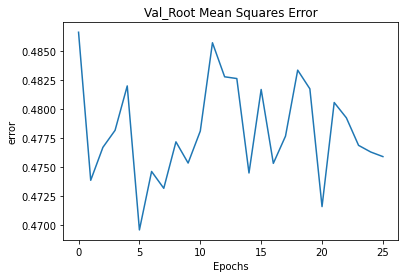

In [22]:
# Let's Visualize how's rmse is varying in the epochs
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Val_Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [23]:
# Now Let's Check MSE of test dataset
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

448.88064641579115

In [24]:
# Now Let's Check MSE of train dataset
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

342.23909013367347

In [25]:
# Now to evaluate the performance of model need to check R2 score
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.6883579149827483

In [26]:
# R2 score on training dataset
r2_score(train_pred_orig, y_train_orig)

0.8282722688945854

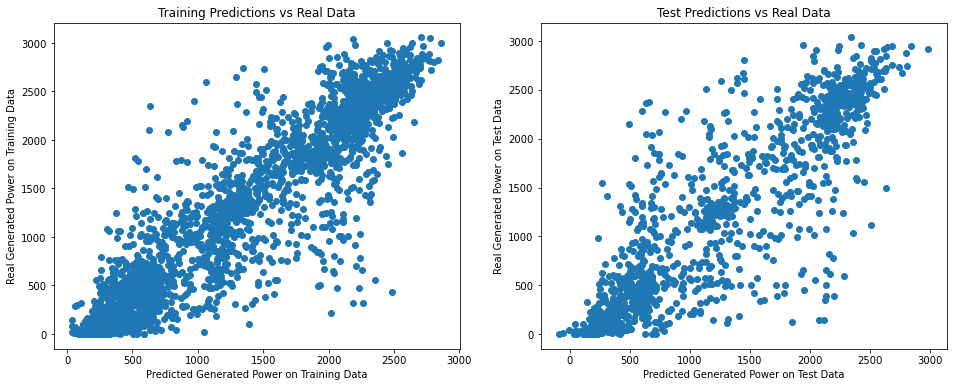

In [27]:
# Now that we have got the result let's visualize the the data of both train and test dataset
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')

plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

### From this we can see that in training Data is performing well as more Data is clustered to diagonal while in test dataset points are very scattered

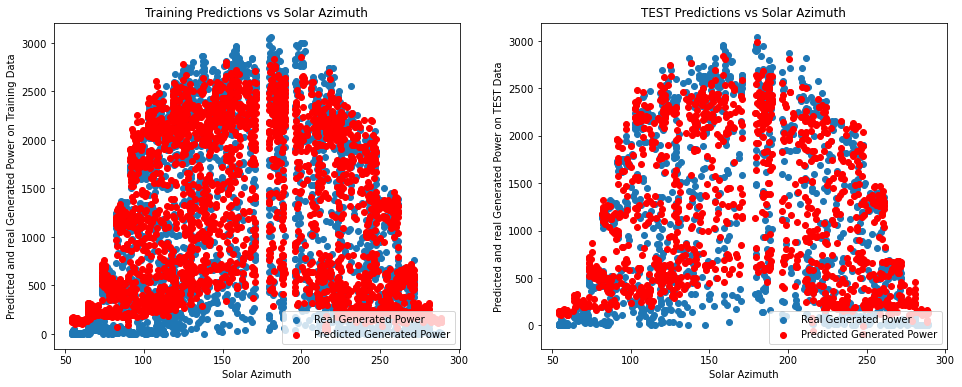

In [28]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

### Let's use RandomForestRegressor 

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth= 10) 
rf.fit(X,y)
Important_features = rf.feature_importances_
Important_features

C:\Users\Viren\AppData\Local\Temp\ipykernel_1084\1161774397.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,y)


array([1.50322372e-02, 2.79897448e-02, 2.23253551e-02, 3.51150361e-03,
       3.62064004e-04, 1.45728842e-01, 5.00216538e-03, 5.43658087e-03,
       9.02537250e-03, 7.17835696e-02, 6.41401470e-03, 7.73223408e-03,
       6.03929511e-03, 7.04808288e-03, 7.54279029e-03, 6.72500652e-03,
       1.91002487e-02, 3.93327126e-01, 1.38691913e-01, 1.01181854e-01])

In [30]:
# Now to determine which column has been given importance let's prepare barplot for feature importance
columns = list(set(dts.columns) - set(['generated_power_kw']))
feature_importance = pd.DataFrame(Important_features)
feature_importance['columns'] = columns

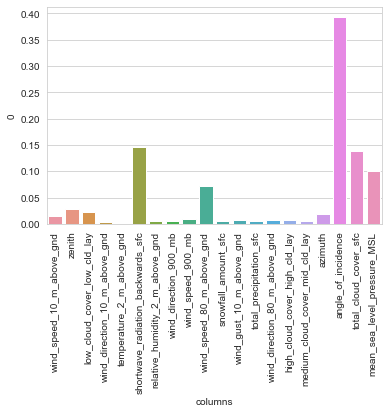

In [32]:
sns.set_style('whitegrid')
sns.barplot(data=feature_importance,x='columns',y=feature_importance[0])
plt.xticks(rotation=90)
plt.show()

### with this we can clearly see that angle of incidence has the highest importance followed by cloud cover ,MSL, shortwave radiation and wind speed.

In [38]:
# Using Lasso Regression we will penalize the data and perform linear regression and get the coefficient of the same.
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.39
mean_sea_level_pressure_MSL,0.11
wind_speed_80_m_above_gnd,0.02
snowfall_amount_sfc,0.01
wind_direction_10_m_above_gnd,0.01
wind_direction_80_m_above_gnd,0.01
wind_speed_10_m_above_gnd,0.00
wind_direction_900_mb,-0.00
wind_gust_10_m_above_gnd,0.00
total_precipitation_sfc,-0.00


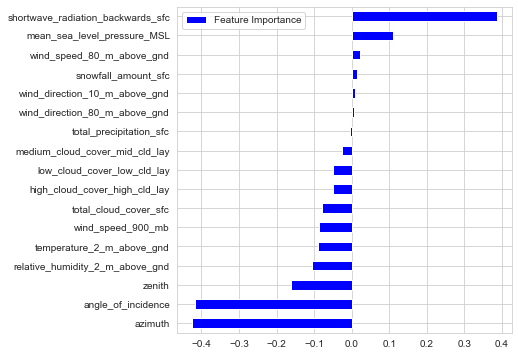

In [39]:
# Let's visualise the aboe result.
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')

### In this also we can clearly see that azimuth, angle of incidence shortwave radiation, msl pressure is having the highest importance to Solar Power Generation.